Installed the previous version of openCV as in new version, pose estimation was not working

In [1]:
!pip uninstall opencv-python -y
!pip uninstall opencv-contrib-python -y

Found existing installation: opencv-python 4.8.0.76
Uninstalling opencv-python-4.8.0.76:
  Successfully uninstalled opencv-python-4.8.0.76
Found existing installation: opencv-contrib-python 4.8.0.76
Uninstalling opencv-contrib-python-4.8.0.76:
  Successfully uninstalled opencv-contrib-python-4.8.0.76


In [2]:
!pip install opencv-contrib-python==4.6.0.66

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 11.7 MB/s eta 0:00:00


In [55]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Function for estimating the pose of the aruco and displaying the 3D axis on detected marker

In [68]:
def pose_estimation(frame, aruco_dict_type, matrix_coefficients, distortion_coefficients):

	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	arucoDict=cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
	arucoParams=cv2.aruco.DetectorParameters_create()
	corners, ids, rejected_img_points=cv2.aruco.detectMarkers(gray,arucoDict,parameters=arucoParams)


	if len(corners) > 0:
		for i in range(0, len(ids)):
			rvec, tvec, markerPoints = cv2.aruco.estimatePoseSingleMarkers(corners[i], 50, matrix_coefficients,distortion_coefficients)
			cv2.aruco.drawDetectedMarkers(frame, corners)
			cv2.drawFrameAxes(frame, matrix_coefficients, distortion_coefficients, rvec, tvec, 10)
			print("tvec : ",tvec)
	if ids is not None:
		for i in range(len(ids)):
			# Compute center of the marker
			c = corners[i][0]
			x_sum = corners[0][0][0][0] + corners[0][0][1][0] + corners[0][0][2][0] + corners[0][0][3][0]
			y_sum = corners[0][0][0][1] + corners[0][0][1][1] + corners[0][0][2][1] + corners[0][0][3][1]
			x_centerPixel = x_sum /4
			y_centerPixel = y_sum /4

	return frame, x_centerPixel,y_centerPixel


Declaring the required function markers for displaying pose axis on detected marker image.

In [69]:
def markers(s):

  img = cv2.imread(s)
  h,w,_=img.shape
  # Reshaping image
  width=1000
  height=int(width*(h/w))
  img=cv2.resize(img,(width,height),interpolation=cv2.INTER_CUBIC)

  # Camera matrix and distortion coefficients
  intrinsic_camera = np.array(((560.26831365  , 0.,         651.26205498),( 0.   ,      561.31870941 ,499.05498086),(0,0,1)))
  distortion = np.array(( -2.32876385e-01  ,6.16788766e-02, -1.40234765e-05,  3.81911252e-05,
    -7.54075162e-03))

  detected_markers,xc,yc = pose_estimation(img,cv2.aruco.DICT_4X4_50,intrinsic_camera,distortion)
  print("xc : ",xc) # marker centre x
  print("yc : ",yc) # marker centre y
  print("image xc : " ,width/2) # image centre x
  print("image yc : " ,height/2) # image centre y

  cv2_imshow(detected_markers)
  cv2.destroyAllWindows()

tvec :  [[[ 20.73074615 -89.35955848 133.49333701]]]
xc :  729.5
yc :  162.75
image xc :  500.0
image yc :  375.0


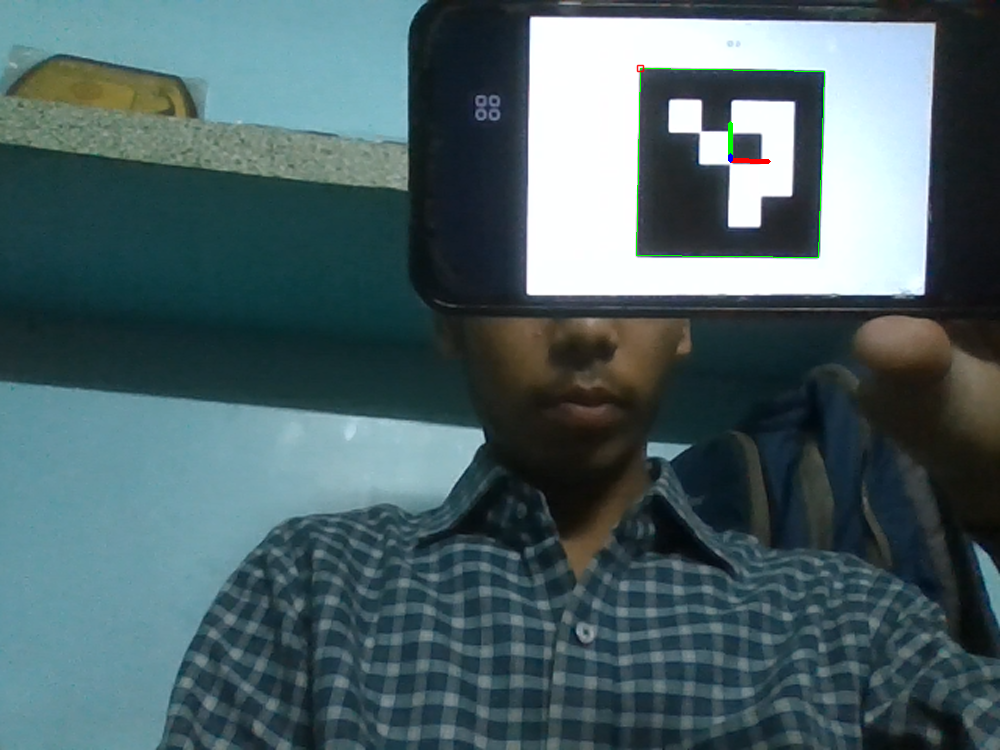

In [71]:
markers("aruco20.png")